# Chiebuka Onwuzurike MSBA '21
# Instructions: BA870 – Assignment 2 (June 2021)

This is an individual assignment – You must complete this assignment on your own and it must be your own work (not copied from another BA870 student)

Due: Submit to Assignments Tab (Assignment #2) by Thursday, June 17 at 8:00pm (Boston Time)

Main Deliverables:

- Complete Steps listed below.
- Attach your Notebook (Use the name "Assignment #2 - YOUR NAME.ipynb" and your CSV file with "assign1.csv") in the Attachments part of this assignment submission.
- Attach a PDF file (Use the name ""Assignment #2 - YOUR NAME.pdf") that include ALL of the text boxes and executed python code output from your Colab notebook in the Attachments part of this assignment submission.

# Goals:

Learn about financial credit ratings. You should read this Wikipedia note (Only the section on "Credit Ratings"):
https://en.wikipedia.org/wiki/S%26P_Global_Ratings
Use WRDS Compustat financial variables to explain variation in companies' Credit Ratings.
Apply an in-sample linear regression model (OLS) to determine which financial variables are statistically significant determinants of a company's Credit Rating.
Further improve your skills to access and download companies’ financial accounting data from the S&P Compustat database using the WRDS platform (https://wrds.wharton.upenn.edu)
Provide a report of your completed assignments and analysis using “Markdown” text boxes in Colab Notebook
Share a Colab Notebook using shareable weblink.
Print a completed and executed Colab Notebook and submit in PDF format.

# Steps:

##(1) Attached to this assignment are 2 files:

### File #1
"assignment2.csv" contains a comma-delimited data set for 354 manufacturing companies for the fiscal year 2006. The variables in the file are:

- TICKER
- CREDIT RATING (From 2 (Highest Credit Rating) through 23 (Lowest Credit Rating))
- CURRENT ASSETS at end of 2006 ($ millions)
- CURRENT LIABILITIES at end of 2006 ($ millions)
- TOTAL ASSETS at end of 2006 ($ millions)
- RETAINED EARNINGS at end of 2006 ($ millions)
- EARNINGS BEFORE INTEREST AND TAXES for 2006 ($ millions)
- TOTAL LIABILITIES at end of 2006 ($ millions)
- TOTAL SALES for 2006 ($ millions)

### File #2
"assign2_tickers.txt" is a text file with the 354 tickers of manufacturing companies from the year 2006. You may use this file to download additional financial variables for the 524 companies from 2006 (For Fiscal Period January 2006 to December 2006) from WRDS Compustat (OPTIONAL)

## (2) Using the financial data in "assignment2.csv", create a list of financial ratio variables that you believe would help explain the cross-sectional variation in "CREDIT RATING".
Note:
- Make sure you check for outliers and "fix them" (such as winsorizing the variables at 1% and 99% values).

## (3) Estimate a linear regression model to explain "CREDIT RATING" using the financial ratio variables you created in step (2).

### NOTES:
- You must report the key statistical output from the linear regression including:
* R2 and AdjR2
* Estimates of the coefficients for each of the explanatory variables in the regression.
* The statistical significance (t0stat and p-value) for each of the explanatory variables in the regression.

## (4) Using textboxes in your python Notebook, explain and interpret your findings.

# Final Submission:


- Go to the Assignments Tab on QuestromTools
- Click on Assignment #2
- Read this document
- Make sure you put your name in a text box (Markdown) at the top of your  Notebook "Assignment #2 - YOUR NAME.ipynb"
- Attach your Notebook (Use the name "Assignment #2 - YOUR NAME.ipynb" and your CSV file with "assign1.csv").
- Attach a PDF file (Use the name ""Assignment #2 - YOUR NAME.pdf") that include ALL of the text boxes and executed python code output from your Colab notebook.
- Insert the shared link to your completed Colab Notebook on your Google Drive in the text box below.

In [1]:
import os

# the base Google Drive directory
root_dir = "/content/drive/MyDrive/M/MSBA - 5th Year/BA 870 - Financial and Accounting Analytics"

# choose where you want your project files to be saved
project_folder = "/Assignment 2"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)
  
  # create a test file to make sure it shows up in the right place
#   !touch 'new_file_in_working_directory.txt'
#   print('\nYour working directory was changed to ' + root_dir + project_folder + \
#         "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )
create_and_set_working_directory(project_folder)

In [2]:
# !ls

In [3]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data Loading
Added Extra Variables book_value_per_share, shares_issued, shares_outstanding, inventory, acct_receivable, total_equity, working_cap, mkt_value, cogs, net_income, and interest_exp to caluclate more ratios

In [4]:
# load the csv files
df = pd.read_csv("assignment2.csv")

In [5]:
# df.sample(5)

# Data Engineering


In [6]:
df["book_value"] = df.book_value_per_share * df.shares_outstanding # Book Value
df["acid_ratio"] = (df.current_assets - df.inventory)/df.current_liabilities # Acid Ratio
df["current_ratio"] = df.current_assets / df.current_liabilities # Current Ratio

df["coverage_ratio"] = df.ebit / df.interest_exp # Interest Coverage Ratio
df['bep'] = df.ebit / df.total_assets # Basic Earnings Power Ratio

df["inventory_turnover"] = df.cogs / (df.inventory/365) # Inventory Turnover
df["dso"] = df.acct_receivable / (df.total_sales/365) # Days Sales Outstanding

df["roa"] = df.net_income / df.total_assets # Return on Assets
df["roe"] = df.net_income / df.total_equity # Return on Equity

df['debit_asset_ratio'] = df.total_liabilities / df.total_assets # Debit to Asset Ratio
df["debit_equity_ratio"] = df.total_liabilities / df.total_equity # Debit to Equity Ratio

In [7]:
df.columns

Index(['ticker', 'current_assets', 'total_assets', 'ebit',
       'current_liabilities', 'total_liabilities', 'retained_earnings',
       'total_sales', 'credit_rating', 'book_value_per_share', 'shares_issued',
       'shares_outstanding', 'inventory', 'acct_receivable', 'total_equity',
       'working_cap', 'mkt_value', 'cogs', 'net_income', 'interest_exp',
       'book_value', 'acid_ratio', 'current_ratio', 'coverage_ratio', 'bep',
       'inventory_turnover', 'dso', 'roa', 'roe', 'debit_asset_ratio',
       'debit_equity_ratio'],
      dtype='object')

# Data Summary

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ticker                354 non-null    object 
 1   current_assets        352 non-null    float64
 2   total_assets          354 non-null    float64
 3   ebit                  354 non-null    float64
 4   current_liabilities   353 non-null    float64
 5   total_liabilities     354 non-null    float64
 6   retained_earnings     354 non-null    float64
 7   total_sales           354 non-null    float64
 8   credit_rating         354 non-null    int64  
 9   book_value_per_share  354 non-null    float64
 10  shares_issued         353 non-null    float64
 11  shares_outstanding    354 non-null    float64
 12  inventory             354 non-null    float64
 13  acct_receivable       353 non-null    float64
 14  total_equity          249 non-null    float64
 15  working_cap           3

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
current_assets,352.0,4.573439e+03,9732.694678,22.094000,593.983750,1429.000000,4019.000000,9.188500e+04
total_assets,354.0,1.325217e+04,31574.580520,112.675000,1599.039500,3525.339000,10444.750000,2.785540e+05
ebit,354.0,1.646370e+03,4853.767859,-8167.000000,123.920000,356.000000,1009.450250,5.693900e+04
current_liabilities,353.0,3.219204e+03,7791.253422,18.740000,283.542000,749.289000,2560.000000,7.674800e+04
total_liabilities,354.0,7.597234e+03,20785.050912,48.123000,912.250000,1987.700000,6153.828750,2.808600e+05
retained_earnings,354.0,4.432750e+03,15233.620782,-7863.000000,74.619500,760.108000,2408.700000,1.924450e+05
total_sales,354.0,1.266152e+04,34093.899680,4.159000,1496.367000,3648.101000,9588.753500,3.350860e+05
credit_rating,354.0,1.187006e+01,3.594938,2.000000,9.000000,12.000000,15.000000,2.300000e+01
book_value_per_share,354.0,1.254939e+04,236860.184488,-288931.000000,7.271650,11.948100,18.798325,4.420000e+06
shares_issued,353.0,4.651418e+02,1012.282882,0.001000,55.386000,116.171000,336.960000,8.819000e+03


# EDA
Visual null values and Histogram of numeric variables

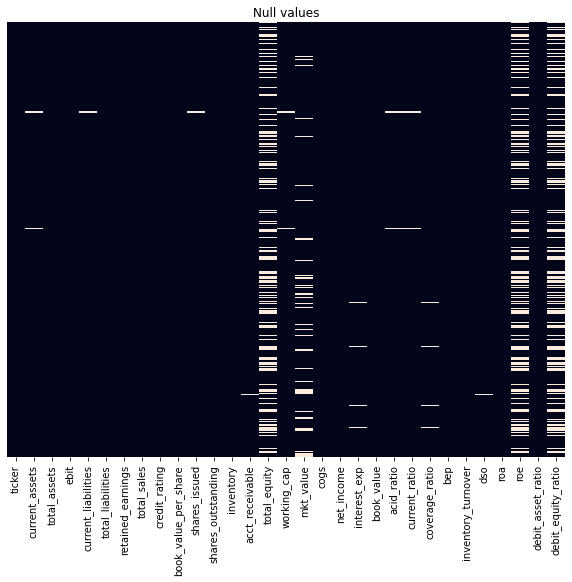

In [10]:
plt.figure(figsize=(10, 8))
plt.title("Null values")
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)
plt.show()

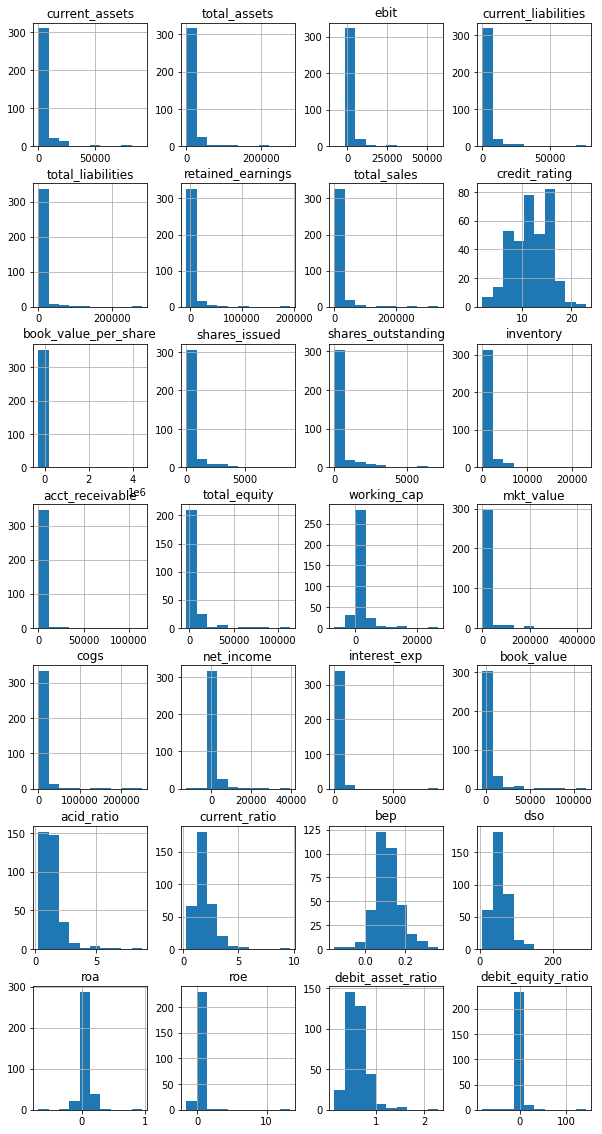

In [11]:
# infinity and nonnumeric values not able to be plotted 
numeric_col = list(df.drop(["coverage_ratio","inventory_turnover"],axis =1).describe(include=[np.number]).columns)  
df_numeric = df[numeric_col]

fig, axes = plt.subplots(len(numeric_col)//4, 4, figsize=(10, 20))

i = 0
for triaxis in axes:
    for axis in triaxis:
        df_numeric.hist(column = numeric_col[i], ax=axis)
        i = i+1

# Data Cleaning
Attempted to windsorized data

In [12]:
# def fences(df, variable_name):    
#     q1 = df[variable_name].quantile(0.25)
#     q3 = df[variable_name].quantile(0.75)
#     iqr = q3-q1
#     outer_fence = 3*iqr
#     outer_fence_le = q1-outer_fence
#     outer_fence_ue = q3+outer_fence
#     return outer_fence_le, outer_fence_ue

# # Printed Variable Outer Quartiles
# for col in df_numeric.columns:
#     outer_fence_le, outer_fence_ue = fences(df, col)
#     print(f'{col}\nLower end outer fence:\t{outer_fence_le}\nUpper end outer fence:\t{outer_fence_ue}\n')


def df_winsorize(df,lower,upper):
    
    #Create copy of df
    df_win = df.copy(deep=True)

    # Winsorize for loop
    for col in df.describe(include=[np.number]).columns:
        df_win[col]= winsorize(df[col], limits=(lower,upper))
    
    return df_win

df_win = df_winsorize(df,0.01,0.99)

df_win.describe().T

,count,mean,std,min,25%,50%,75%,max
current_assets,354.0,86.216000,2.846194e-13,86.216000,86.216000,86.216000,86.216000,86.216000
total_assets,354.0,203.755000,5.977007e-13,203.755000,203.755000,203.755000,203.755000,203.755000
ebit,354.0,-43.947000,9.250130e-14,-43.947000,-43.947000,-43.947000,-43.947000,-43.947000
current_liabilities,354.0,34.620000,2.063491e-13,34.620000,34.620000,34.620000,34.620000,34.620000
total_liabilities,354.0,88.746000,5.834697e-13,88.746000,88.746000,88.746000,88.746000,88.746000
retained_earnings,354.0,-5191.000000,0.000000e+00,-5191.000000,-5191.000000,-5191.000000,-5191.000000,-5191.000000
total_sales,354.0,179.803000,8.538582e-14,179.803000,179.803000,179.803000,179.803000,179.803000
credit_rating,354.0,2.000000,0.000000e+00,2.000000,2.000000,2.000000,2.000000,2.000000
book_value_per_share,354.0,-5.397100,3.379855e-14,-5.397100,-5.397100,-5.397100,-5.397100,-5.397100
shares_issued,354.0,0.001000,6.514421e-19,0.001000,0.001000,0.001000,0.001000,0.001000


# Variable Explainations

- 'ticker'
- 'current_assets'
- 'total_assets'
- 'ebit',
- 'current_liabilities'
- 'total_liabilities'
- 'retained_earnings'
- 'total_sales'
- 'credit_rating'
- 'book_value_per_share'
- 'shares_issued'
- 'shares_outstanding'
- 'inventory'
- 'acct_receivable'
- 'total_equity'
- 'working_cap'
- 'mkt_value'
- 'cogs'
- 'net_income'
- 'interest_exp'
- 'book_value'

## Ratios
- **'acid_ratio' -** liquidity ratio, which measures the ability of a company to use its near cash or quick assets to extinguish or retire its current liabilities immediately
- **'current_ratio' -** liquidity ratio that measures whether a firm has enough resources to meet its short-term obligations
- **'coverage_ratio' -** measure of a company's ability to honor its debt payments
- **'bep' -** profitability ratio which determines how effectively a firm uses its assets to generate income.
- **'inventroy_turnover' -** measure of the number of times inventory is sold or used in a time period such as a year
- **'dso' -** calculation used by a company to estimate the size of their outstanding accounts receivable
- **'roa' -** measure of how profitable a company's assets are in generating revenue
- **'roe' -**  measure of the profitability of a business in relation to the equity
- **'debit_asset_ratio' -** leverage ratio that defines the total amount of debt relative to assets owned by a company
- **'debit_equity_ratio' -**  leverage ratio that indicates how much debt a company is using to finance its assets relative to the value of shareholders' equity





# Model 1
Dropped Coverage ratio adn inventroy turnover ratio because of infinite vaules.

In [13]:
df_model_1 = df[['acid_ratio', 'current_ratio', 'bep','dso', 'roa', 'roe', 
                 'debit_asset_ratio','debit_equity_ratio','credit_rating']].dropna()

# Dependent Variables
X = df_model_1[['acid_ratio', 'current_ratio',  'bep', 'dso', 'roa', 'roe', 
                'debit_asset_ratio', 'debit_equity_ratio']]

X = sm.add_constant(X)

#Independent Variables
Y = df_model_1[['credit_rating']]

# Fit Model
model = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(model.summary(title="Model # 1"))

                                  Model # 1                                   
Dep. Variable:          credit_rating   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     21.86
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           8.30e-25
Time:                        20:28:16   Log-Likelihood:                -593.42
No. Observations:                 246   AIC:                             1205.
Df Residuals:                     237   BIC:                             1236.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.4444      1

Despite not having a very important metric such as the interest coverge ratio and a third of our data points were we able to get a high R squared.

Large coeficents of Acid Ratio, Current Ratio, Basic Earning Power, Debit to Asset Ratio seems to show high statisical predictive power to credit rating.

# Model 2 
Dropped Equity ratios to use more data points

In [14]:
df_model_2 = df[['acid_ratio', 'current_ratio', 'bep','dso', 'roa', 'debit_asset_ratio','credit_rating']].dropna()

# Dependent Variables
X = df_model_2[['acid_ratio', 'current_ratio',  'bep', 'dso', 'debit_asset_ratio']]

X = sm.add_constant(X)

#Independent Variables
Y = df_model_2[['credit_rating']]

# Fit Model
model2 = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(model2.summary(title="Model # 2"))

                                  Model # 2                                   
Dep. Variable:          credit_rating   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     51.19
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           1.29e-39
Time:                        20:28:16   Log-Likelihood:                -849.38
No. Observations:                 351   AIC:                             1711.
Df Residuals:                     345   BIC:                             1734.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.6619      0.85

Decided to look at model that drop variables with high null values or low statistical significance such ROA, ROE,and Debit-to-Equity.

Significant variables such as Acid Ratio, Current Ratio, Basic Earning Power, Debit to Asset Ratio seemed to stay the same.

# Model 3


Not really sure what the problem was but when I windsorized my data the R^2 was negative infinity.

In [15]:
df_model_3 = df_win[['acid_ratio', 'current_ratio', 'coverage_ratio', 'bep',
       'inventory_turnover', 'dso', 'roa', 'roe', 'debit_asset_ratio',
       'debit_equity_ratio','credit_rating']]
# Dependent Variables
X = df_model_3[['acid_ratio', 'current_ratio', 'coverage_ratio', 'bep',
       'inventory_turnover', 'dso', 'roa', 'roe', 'debit_asset_ratio',
       'debit_equity_ratio']]

X = sm.add_constant(X)

#Independent Variables
Y = df_model_3[['credit_rating']]

# Fit Model
model3 = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(model3.summary(title="Model # 3"))

                                  Model # 3                                   
Dep. Variable:          credit_rating   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                      -inf
Date:                Thu, 24 Jun 2021   Prob (F-statistic):                nan
Time:                        20:28:16   Log-Likelihood:                 11623.
No. Observations:                 354   AIC:                        -2.324e+04
Df Residuals:                     353   BIC:                        -2.324e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
acid_ratio          7.236e-06   2.57

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1657: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


# Model 4
Last model I will try dropping infinite values


In [16]:
df_model_3 = df[['acid_ratio', 'current_ratio', 'coverage_ratio', 'bep',
       'inventory_turnover', 'dso', 'roa', 'debit_asset_ratio','credit_rating']].replace([np.inf, -np.inf], np.nan).dropna(axis=0)


# Dependent Variables
X = df_model_3[['acid_ratio', 'current_ratio', 'coverage_ratio', 'bep',
       'inventory_turnover', 'dso', 'roa','debit_asset_ratio']]

X = sm.add_constant(X)

#Independent Variables
Y = df_model_3[['credit_rating']]

# Fit Model
model3 = sm.OLS(Y, X).fit()

# # Predict Model
# predictions = model.predict(X) 

# Summary Statisitcs
print(model3.summary(title="Model # 3"))

                                  Model # 3                                   
Dep. Variable:          credit_rating   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     34.11
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           2.93e-39
Time:                        20:28:16   Log-Likelihood:                -831.22
No. Observations:                 346   AIC:                             1680.
Df Residuals:                     337   BIC:                             1715.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  7.2901      0

It seems variables such as coverage ratio and inventory turnover that had infinite values where not so predicitve. Honestly I must have done something wrong because the coverage ratio is a good indicator for insolvency.


# Conclusion

In conclusion the variables that had the most predictive power credit ratings were:

- **Acid Ratio -** a liquidity ratio, which measures the ability of a company to use its near cash or quick assets to extinguish or retire its current liabilities immediately
- **Current Ratio -** liquidity ratio that measures whether a firm has enough resources to meet its short-term obligations
- **Basic Earning Power -** profitability ratio which determines how effectively a firm uses its assets to generate income.
- **Debit to Asset Ratio -** leverage ratio that defines the total amount of debt relative to assets owned by a company

